<a href="https://colab.research.google.com/github/DaniilAszn/Sci-tech_methods_course/blob/main/Dimensionless_complexes_for_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы научно-технического прогнозирования

Тема работы: Анализ набора данных легковых автомобилей (БМВ и Митсубиши) с помощью методов теории безразмерных комплексов

## Этап 0: Данные.

In [139]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.style.use('ggplot')

In [140]:
df = pd.read_csv('Cars.txt', delimiter='\t')

In [141]:
df.head()

,Марка,Серия,Полная масса [кг],Максимальный крутящий момент [Н*м],Мощность двигателя [л.с.],Объем двигателя [см3],Тип двигателя,Количество цилиндров,Тип КПП,Количество передач,Привод,Объём топливного бака [л],Разгон до 100 км/ч [сек],Максимальная скорость [км/ч],Расход топлива в городе на 100 км [л]
0,BMW,Кабриолет,1940,300,143,1995,Дизельный,4,Автомат,6.0,Задний,51,9.6,208,7.3
1,BMW,Кабриолет,1915,300,143,1995,Дизельный,4,Механика,6.0,Задний,51,9.5,208,5.8
2,BMW,Кабриолет,1885,190,143,1995,Бензиновый,4,Автомат,6.0,Задний,53,10.1,208,8.7
3,BMW,Кабриолет,1885,190,143,1995,Бензиновый,4,Автомат,6.0,Задний,53,10.1,208,9.2
4,BMW,Кабриолет,1860,190,143,1995,Бензиновый,4,Механика,6.0,Задний,53,9.3,210,8.5


## Этап 1: Перевод в систему СИ

Мы будем работать с 7-ю показателями. Переведём соответствующие значения в систему СИ

* Полная масса $[кг]$
* Максимальный крутящий момент $[Н \cdot м = \frac{кг \cdot м^2}{c^2}]$
* Мощность двигателя $[л. с., 1 л.с. = 375,5 Вт]$
* Объём топливного бака $[л]$
* Разгон до 100 км/ч $[с]$
* Максимальная скорость $[\frac{м}{с}]$
* Расход топлива в городе на 100 км $[л]$


In [142]:
df['Мощность двигателя [л.с.]'] = df['Мощность двигателя [л.с.]'] * 375.5
df['Мощность двигателя [л.с.]']

0      53696.5
1      53696.5
2      53696.5
3      53696.5
4      53696.5
        ...   
155    35672.5
156    35672.5
157    35672.5
158    40929.5
159    56325.0
Name: Мощность двигателя [л.с.], Length: 160, dtype: float64

In [143]:
df['Максимальная скорость [км/ч]'] = df['Максимальная скорость [км/ч]'] * 0.278
df['Максимальная скорость [км/ч]']

0      57.824
1      57.824
2      57.824
3      57.824
4      58.380
        ...  
155    50.040
156    50.040
157    50.040
158    52.820
159    58.380
Name: Максимальная скорость [км/ч], Length: 160, dtype: float64

In [144]:
df.rename(columns={'Мощность двигателя [л.с.]': 'Мощность двигателя [Вт]'}, inplace=True)
df.rename(columns={'Максимальная скорость [км/ч]': 'Максимальная скорость [м/c]'}, inplace=True)
df

,Марка,Серия,Полная масса [кг],Максимальный крутящий момент [Н*м],Мощность двигателя [Вт],Объем двигателя [см3],Тип двигателя,Количество цилиндров,Тип КПП,Количество передач,Привод,Объём топливного бака [л],Разгон до 100 км/ч [сек],Максимальная скорость [м/c],Расход топлива в городе на 100 км [л]
0,BMW,Кабриолет,1940,300,53696.5,1995,Дизельный,4,Автомат,6.0,Задний,51,9.6,57.824,7.3
1,BMW,Кабриолет,1915,300,53696.5,1995,Дизельный,4,Механика,6.0,Задний,51,9.5,57.824,5.8
2,BMW,Кабриолет,1885,190,53696.5,1995,Бензиновый,4,Автомат,6.0,Задний,53,10.1,57.824,8.7
3,BMW,Кабриолет,1885,190,53696.5,1995,Бензиновый,4,Автомат,6.0,Задний,53,10.1,57.824,9.2
4,BMW,Кабриолет,1860,190,53696.5,1995,Бензиновый,4,Механика,6.0,Задний,53,9.3,58.380,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Mitsubishi,Хетчбэк 3-дв.,1435,125,35672.5,1332,Бензиновый,4,Механика,5.0,Передний,47,11.0,50.040,7.7
156,Mitsubishi,Хетчбэк 3-дв.,1570,210,35672.5,1493,Дизельный,3,Робот,6.0,Передний,47,9.9,50.040,5.5
157,Mitsubishi,Хетчбэк 3-дв.,1545,210,35672.5,1493,Дизельный,3,Механика,5.0,Передний,47,9.9,50.040,6.3
158,Mitsubishi,Хетчбэк 3-дв.,1440,145,40929.5,1499,Бензиновый,4,Механика,5.0,Передний,47,9.8,52.820,8.0


In [145]:
df.describe()

,Полная масса [кг],Максимальный крутящий момент [Н*м],Мощность двигателя [Вт],Объем двигателя [см3],Количество цилиндров,Количество передач,Объём топливного бака [л],Разгон до 100 км/ч [сек],Максимальная скорость [м/c],Расход топлива в городе на 100 км [л]
count,160.000000,160.000000,160.000000,160.000000,160.000000,156.000000,160.00000,160.000000,160.000000,160.000000
mean,1774.281250,244.025000,58871.359375,1988.731250,4.287500,5.525641,54.06875,9.258125,57.857012,8.791875
std,179.900258,97.338736,22887.380712,490.865783,0.780159,0.685789,5.00581,2.199184,6.439968,2.174783
min,1035.000000,100.000000,28162.500000,1124.000000,3.000000,4.000000,47.00000,5.200000,37.808000,5.300000
25%,1660.000000,162.000000,40929.500000,1597.000000,4.000000,5.000000,51.00000,7.600000,52.820000,7.200000
50%,1812.500000,210.000000,53696.500000,1995.000000,4.000000,6.000000,53.00000,9.200000,58.102000,8.600000
75%,1896.250000,350.000000,66463.500000,1995.000000,4.000000,6.000000,60.00000,10.725000,62.967000,9.900000
max,2075.000000,407.000000,114903.000000,2996.000000,6.000000,7.000000,75.00000,15.800000,69.500000,14.200000


## Этап 2: Составление безразмерных комплексов.

### Введём небольшие переобозначения для удобства:
* a - Полная масса, $кг$
* b - Максимальный крутящий момент, $\frac{кг \cdot м^2}{c^2}$
* c - Мощность двигателя, $\frac{кг \cdot м^2}{c^3}$
* d - Разгон до 100 км в час, $с$
* e - Максимальная скорость, $\frac{м}{с}$
* f - Объём топливного бака, $л$
* g - Расход топлива на 100 км в городе, $л$

### Общий вид позинома:

$\pi = a^{\alpha} \cdot b^{\beta} \cdot c^{\gamma} \cdot d^{\delta} \cdot e^{\epsilon} \cdot f^{\zeta} \cdot g^{\eta}$

### Составление СЛАУ:

$[кг]: \alpha + \beta + \gamma = 0$

$[м]: 2\beta + 2\gamma + \epsilon = 0$

$[с]: -2\beta -3\gamma + \delta -\epsilon = 0$

$[л]: \zeta + \eta = 0$

### Решение СЛАУ:

$$
\begin{matrix}
\alpha =  \frac{1}{2}\epsilon \\
\beta = -\delta -\frac{1}{2}\epsilon \\
\gamma = C_1 \\
\delta = C_2 \\
\epsilon = C_3 \\
\zeta = -\eta \\
\eta = C_4 \\
\end{matrix}
$$

$Пусть$
$\gamma = \delta = \eta = 1, \epsilon = 2:$

$$
\begin{matrix}
\alpha =  1 \\
\beta = -2 \\
\gamma = 1 \\
\delta = 1 \\
\epsilon = 2 \\
\zeta = -1 \\
\eta = 1 \\
\end{matrix}
$$

### Подтверждение безразмерности:

$\pi = a^1 \cdot \frac{1}{b^2} \cdot c^1 \cdot d^1 \cdot e^2 \cdot \frac{1}{f^1} \cdot g^1 = кг \cdot \frac{с^4}{кг^2 \cdot м^4} \cdot \frac{кг \cdot м^2}{с^3} \cdot c \cdot \frac{м^2}{c^2} \cdot \frac{1}{л} \cdot л = 1$

### Безразмерные комплексы:

$p_1 = \frac{c}{a^1 \cdot b^{-2} \cdot f^{-1}} = \frac{b^2cf}{a}$

$p_2 = \frac{d}{a^1 \cdot b^{-2} \cdot f^{-1}} = \frac{b^2df}{a}$

$p_3 = \frac{e}{a^1 \cdot b^{-2} \cdot f^{-1}} = \frac{b^2ef}{a}$

$p_4 = \frac{g}{a^1 \cdot b^{-2} \cdot f^{-1}} = \frac{b^2fg}{a}$



## Этап 3: Ранговые распределения.

In [146]:
p_1 = list((df['Максимальный крутящий момент [Н*м]'] ** 2 * df['Мощность двигателя [Вт]'] * df['Объём топливного бака [л]']) / df['Полная масса [кг]'])
p_2 = list((df['Максимальный крутящий момент [Н*м]'] ** 2 * df['Разгон до 100 км/ч [сек]'] * df['Объём топливного бака [л]']) / df['Полная масса [кг]'])
p_3 = list((df['Максимальный крутящий момент [Н*м]'] ** 2 * df['Максимальная скорость [м/c]'] * df['Объём топливного бака [л]']) / df['Полная масса [кг]'])
p_4 = list((df['Максимальный крутящий момент [Н*м]'] ** 2 * df['Объём топливного бака [л]'] * df['Расход топлива в городе на 100 км [л]']) / df['Полная масса [кг]'])

In [147]:
ln_p_1 = [m.log(p_i) for p_i in p_1]
ln_p_2 = [m.log(p_i) for p_i in p_2]
ln_p_3 = [m.log(p_i) for p_i in p_3]
ln_p_4 = [m.log(p_i) for p_i in p_4]

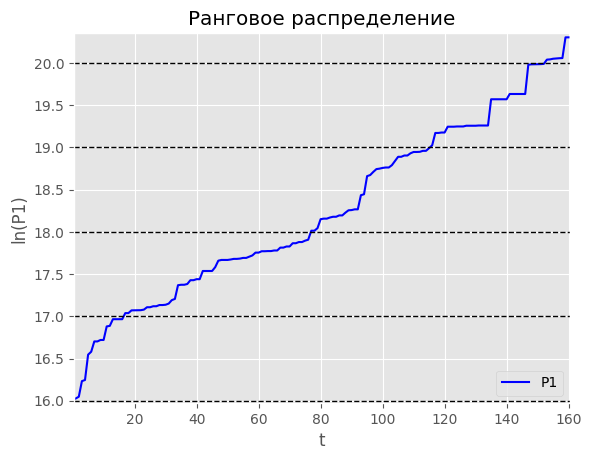

In [148]:
t = [i for i in range(1, len(ln_p_1) + 1)]

plt.plot(t, sorted(ln_p_1), color='blue', label='P1')
for i in range(1, 25):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_1) - 0.05, max(ln_p_1) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P1)')
plt.title('Ранговое распределение')
plt.legend()

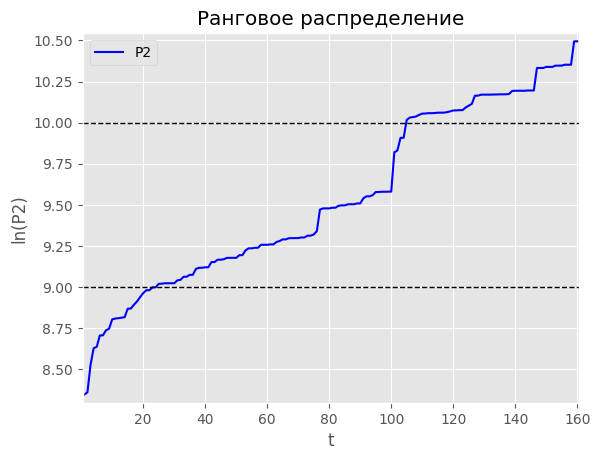

In [149]:
t = [i for i in range(1, len(ln_p_2) + 1)]

plt.plot(t, sorted(ln_p_2), color='blue', label='P2')
for i in range(1, 25):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_2) - 0.05, max(ln_p_2) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P2)')
plt.title('Ранговое распределение')
plt.legend()

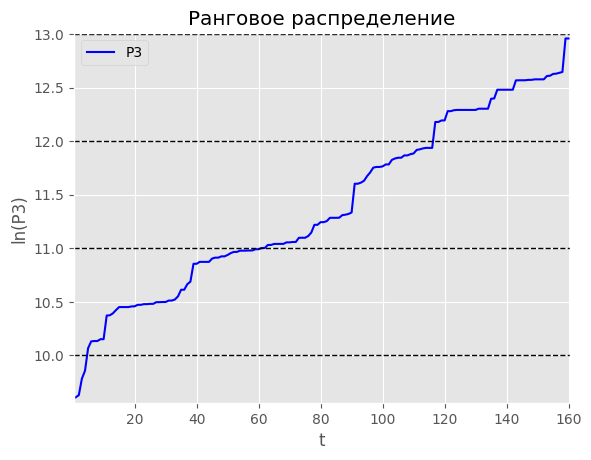

In [150]:
t = [i for i in range(1, len(ln_p_3) + 1)]

plt.plot(t, sorted(ln_p_3), color='blue', label='P3')
for i in range(1, 25):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.05, max(ln_p_3) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P3)')
plt.title('Ранговое распределение')
plt.legend()

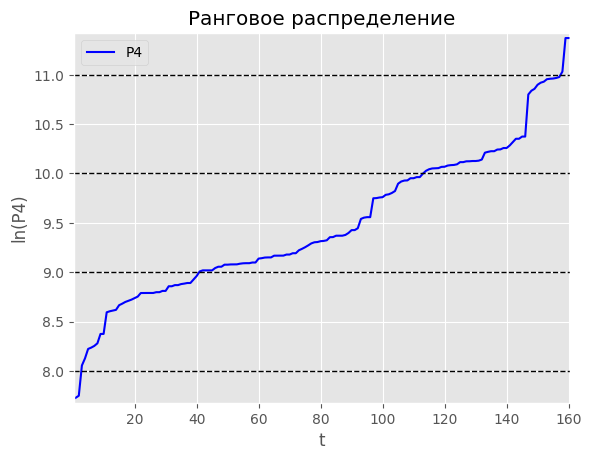

In [151]:
t = [i for i in range(1, len(ln_p_4) + 1)]

plt.plot(t, sorted(ln_p_4), color='blue', label='P4')
for i in range(1, 25):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_4) - 0.05, max(ln_p_4) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P4)')
plt.title('Ранговое распределение')
plt.legend()

## Этап 4: Точечная диаграмма. Реализация классификатора.

### 4.1 (ln(P1), ln(P2))

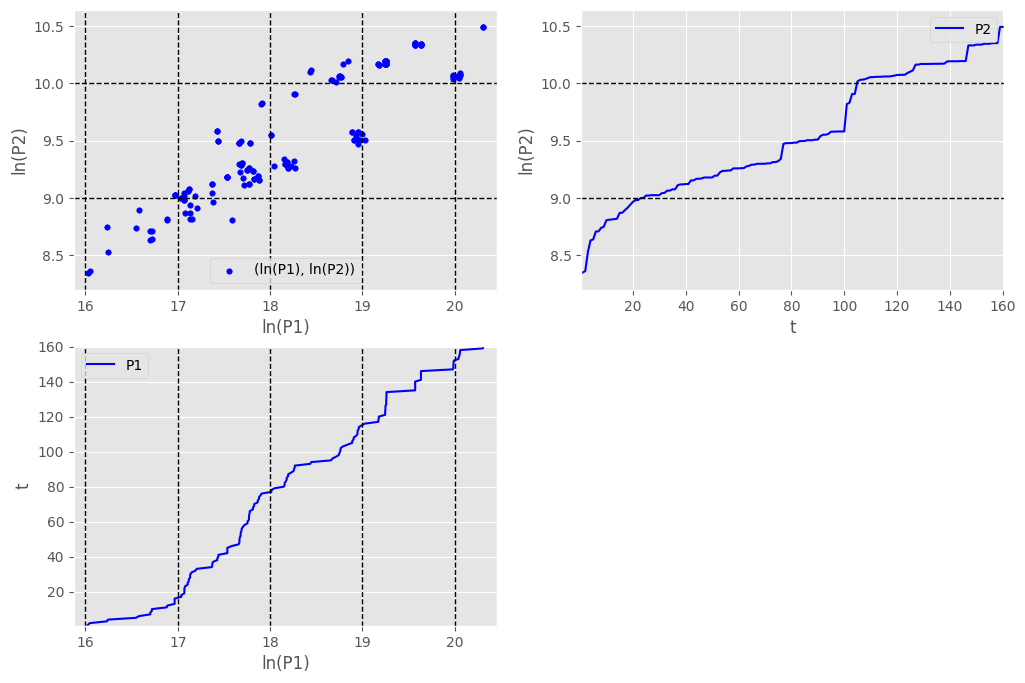

In [152]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_1, ln_p_2, color='blue', s=15, label='(ln(P1), ln(P2))')
for i in range(1, 25):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P2)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_2) + 1)], sorted(ln_p_2), color='blue', label='P2')
for i in range(1, 25):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P2)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_1), [i for i in range(1, len(ln_p_1) + 1)], color='blue', label='P1')
for i in range(1, 25):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P1)')
plt.ylabel('t')
ax3.legend()

### 4.2 (ln(P1), ln(P3))

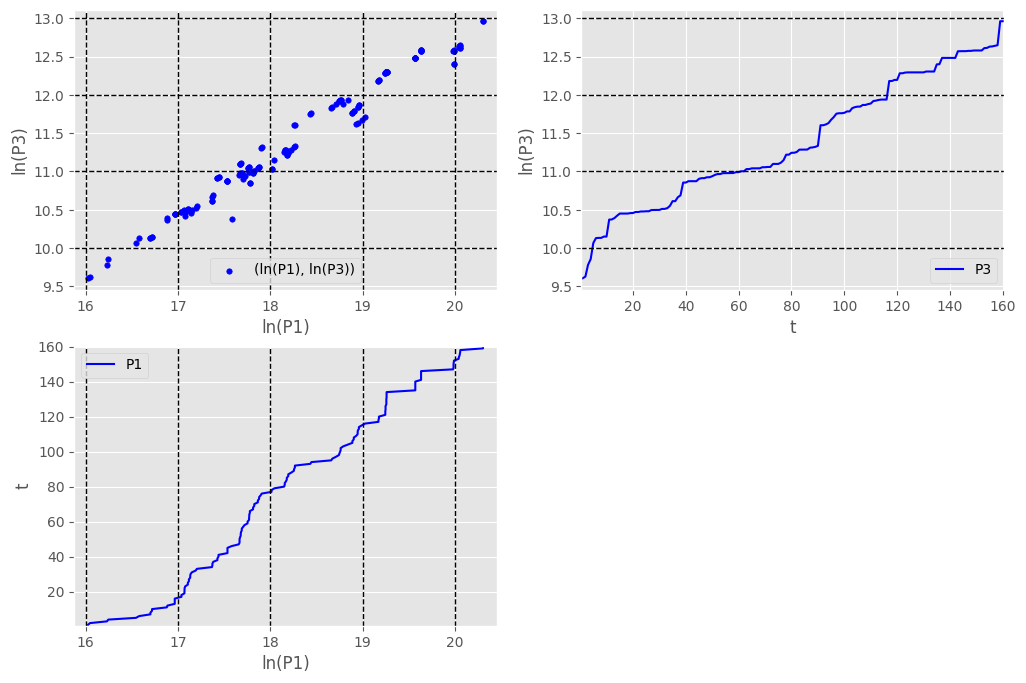

In [153]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_1, ln_p_3, color='blue', s=15, label='(ln(P1), ln(P3))')
for i in range(1, 25):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P3)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_3) + 1)], sorted(ln_p_3), color='blue', label='P3')
for i in range(1, 25):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P3)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_1), [i for i in range(1, len(ln_p_1) + 1)], color='blue', label='P1')
for i in range(1, 25):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P1)')
plt.ylabel('t')
ax3.legend()

### 4.3 (ln(P1), ln(P4))

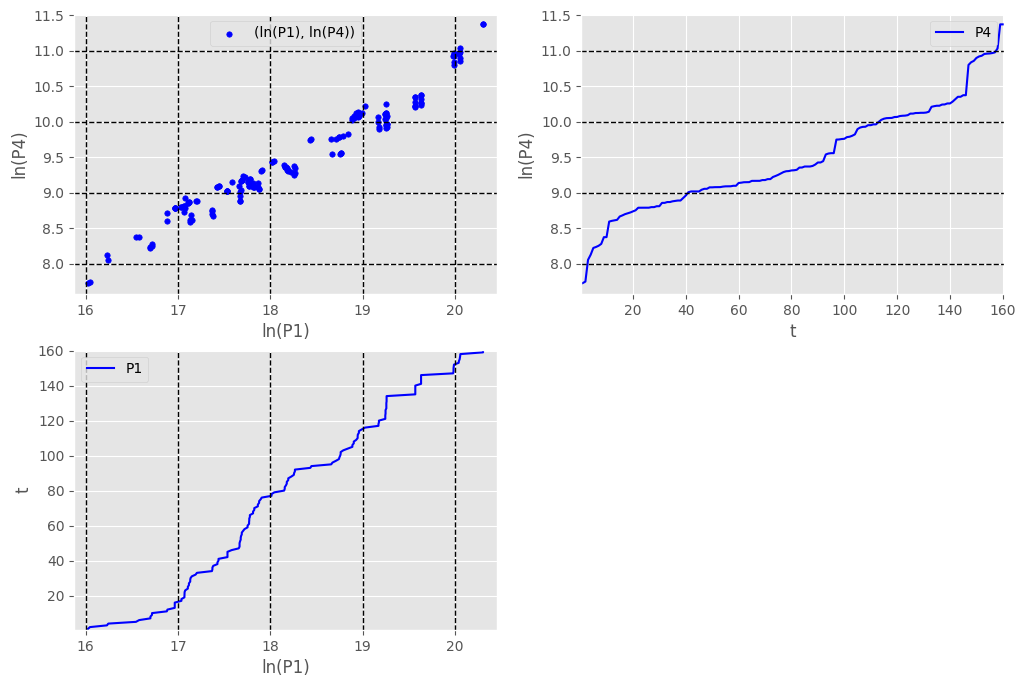

In [154]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_1, ln_p_4, color='blue', s=15, label='(ln(P1), ln(P4))')
for i in range(1, 25):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(ln_p_4) - 0.15, max(ln_p_4) + 0.15)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P4)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_4) + 1)], sorted(ln_p_4), color='blue', label='P4')
for i in range(1, 25):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_4) - 0.15, max(ln_p_4) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P4)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_1), [i for i in range(1, len(ln_p_1) + 1)], color='blue', label='P1')
for i in range(1, 25):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P1)')
plt.ylabel('t')
ax3.legend()

### 4.4 (ln(P2), ln(P3))

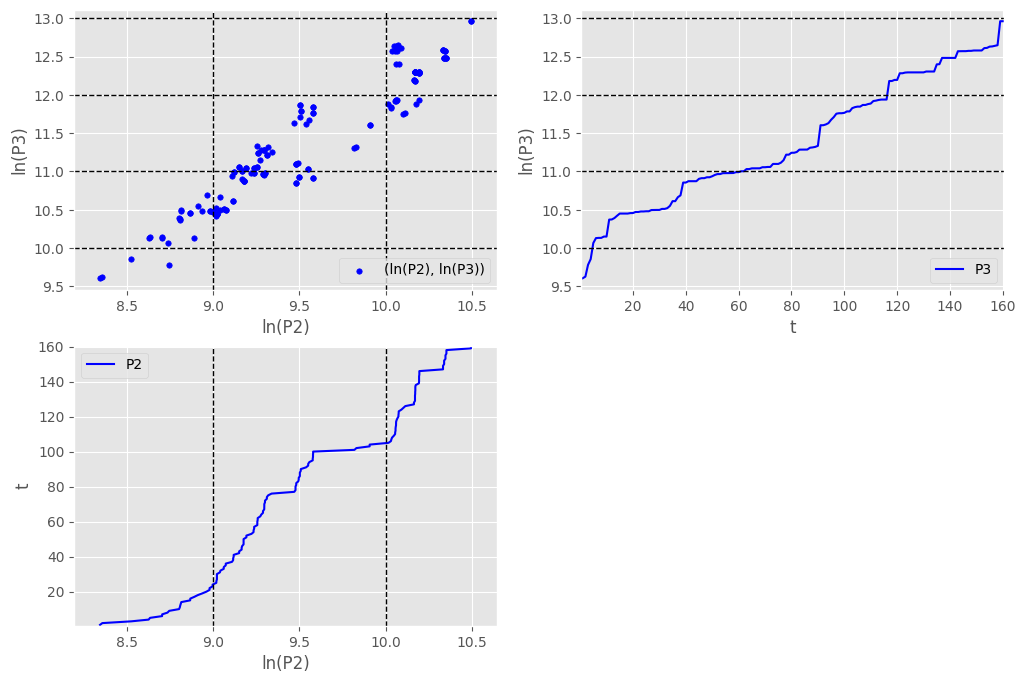

In [155]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_2, ln_p_3, color='blue', s=15, label='(ln(P2), ln(P3))')
for i in range(1, 25):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('ln(P2)')
plt.ylabel('ln(P3)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_3) + 1)], sorted(ln_p_3), color='blue', label='P3')
for i in range(1, 25):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P3)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_2), [i for i in range(1, len(ln_p_2) + 1)], color='blue', label='P2')
for i in range(1, 25):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P2)')
plt.ylabel('t')
ax3.legend()

### 4.5 (ln(P2), ln(P4))

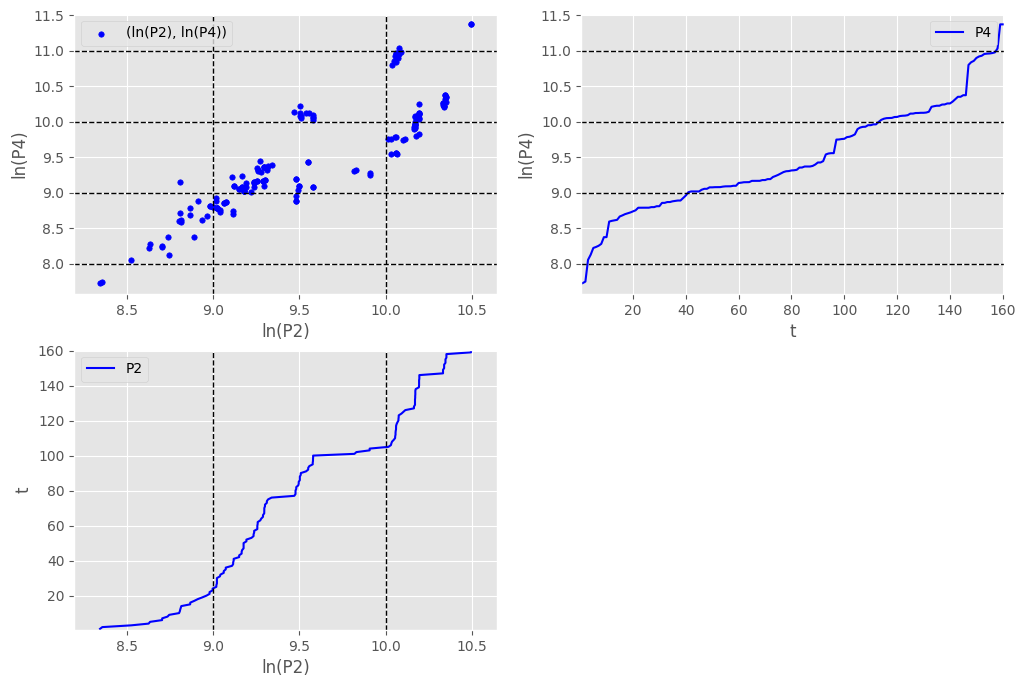

In [156]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_2, ln_p_4, color='blue', s=15, label='(ln(P2), ln(P4))')
for i in range(1, 25):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.ylim(min(ln_p_4) - 0.15, max(ln_p_4) + 0.15)
plt.xlabel('ln(P2)')
plt.ylabel('ln(P4)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_4) + 1)], sorted(ln_p_4), color='blue', label='P4')
for i in range(1, 25):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_4) - 0.15, max(ln_p_4) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P4)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_2), [i for i in range(1, len(ln_p_2) + 1)], color='blue', label='P2')
for i in range(1, 25):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P2)')
plt.ylabel('t')
ax3.legend()

### 4.6 (ln(P3), ln(P4))



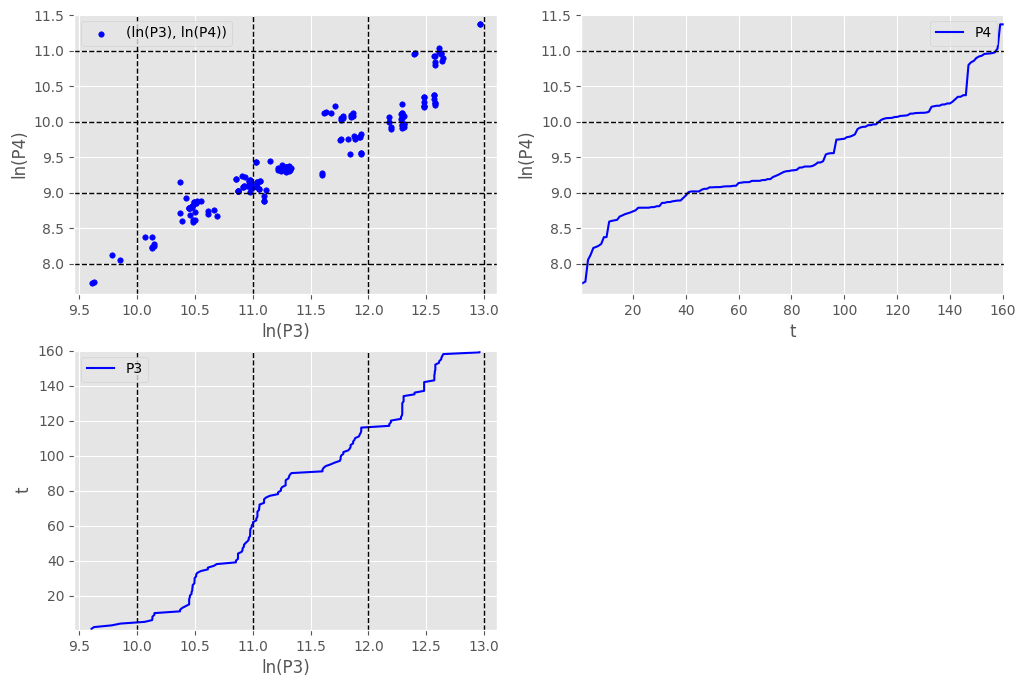

In [157]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_3, ln_p_4, color='blue', s=15, label='(ln(P3), ln(P4))')
for i in range(1, 25):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.ylim(min(ln_p_4) - 0.15, max(ln_p_4) + 0.15)
plt.xlabel('ln(P3)')
plt.ylabel('ln(P4)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_4) + 1)], sorted(ln_p_4), color='blue', label='P4')
for i in range(1, 25):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_4) - 0.15, max(ln_p_4) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P4)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_3), [i for i in range(1, len(ln_p_3) + 1)], color='blue', label='P3')
for i in range(1, 25):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P3)')
plt.ylabel('t')
ax3.legend()

## Этап 5: Критический уровень

Реперная таблица:
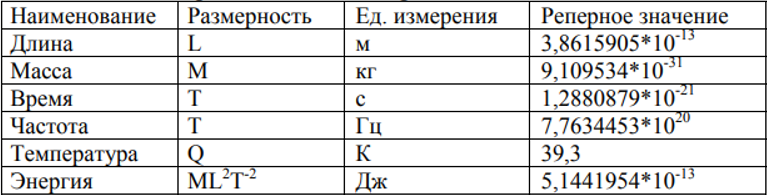

In [158]:
'''
c - Мощность двигателя
d - Разгон до 100 км в час
e - Максимальная скорость
g - Расход топлива на 100 км в городе
'''

c = df['Мощность двигателя [Вт]'] * ((9.109534 * 10 ** -31 * (3.8615905 * 10 ** -13) ** 2) / (1.2880879 * 10 ** -21) ** 3)
d = df['Разгон до 100 км/ч [сек]'] * (1.2880879 * 10 ** -21)
e = df['Максимальная скорость [м/c]'] * ((3.8615905 * 10 ** -13) / (1.2880879 * 10 ** -21))
g = df['Расход топлива в городе на 100 км [л]'] * 1000

### 5.1 (c, d)

Критическое значение для мощности двигателя и разгона до 100 км в час равно 7303372669436.49 и 2.035178882e-20 соответсвтенно


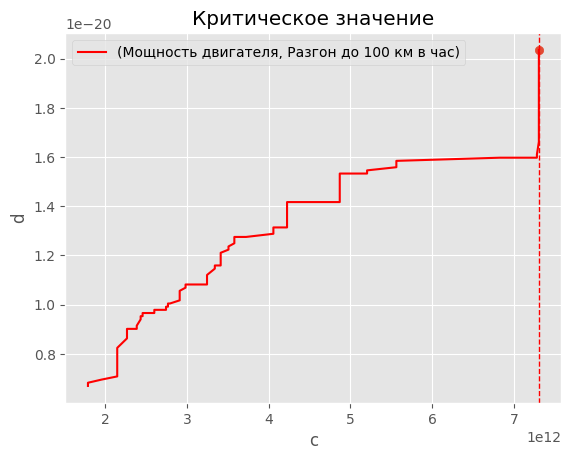

In [159]:
print(f'Критическое значение для мощности двигателя и разгона до 100 км в час равно {max(c)} и {max(d)} соответсвтенно')
plt.plot(sorted(c), sorted(d), color='red', label='(Мощность двигателя, Разгон до 100 км в час)')
plt.scatter(max(c), max(d))
plt.axvline(max(c), color='red', linestyle='--', lw=1)
plt.xlabel('c')
plt.ylabel('d')
plt.title('Критическое значение')
plt.legend()

### 5.2 (c, e)

Критическое значение для мощности двигателя и максимальной скорости равно 7303372669436.49 и 20835576496.75927 соответсвтенно


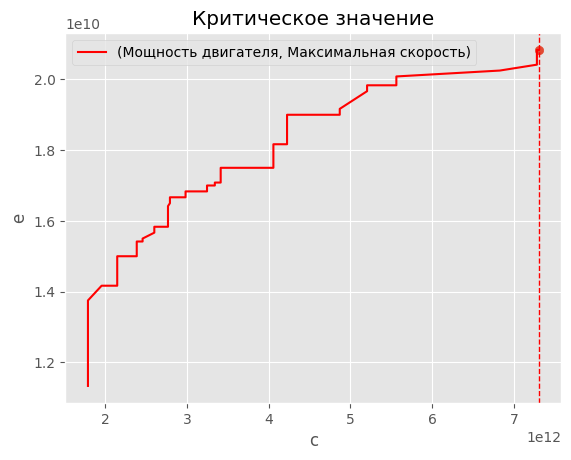

In [160]:
print(f'Критическое значение для мощности двигателя и максимальной скорости равно {max(c)} и {max(e)} соответсвтенно')
plt.plot(sorted(c), sorted(e), color='red', label='(Мощность двигателя, Максимальная скорость)')
plt.scatter(max(c), max(e))
plt.axvline(max(c), color='red', linestyle='--', lw=1)
plt.xlabel('c')
plt.ylabel('e')
plt.title('Критическое значение')
plt.legend()

### 5.3 (c, g)

Критическое значение для мощности двигателя и расхода топлива на 100 км равно 7303372669436.49 и 14200.0 соответсвтенно


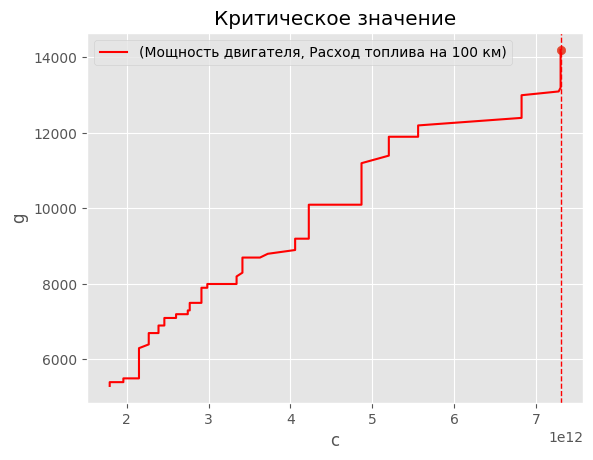

In [161]:
print(f'Критическое значение для мощности двигателя и расхода топлива на 100 км равно {max(c)} и {max(g)} соответсвтенно')
plt.plot(sorted(c), sorted(g), color='red', label='(Мощность двигателя, Расход топлива на 100 км)')
plt.scatter(max(c), max(g))
plt.axvline(max(c), color='red', linestyle='--', lw=1)
plt.xlabel('c')
plt.ylabel('g')
plt.title('Критическое значение')
plt.legend()

### 5.4 (d, e)

Критическое значение для разгона до 100 км в час и максимальной скорости равно 2.035178882e-20 и 20835576496.75927 соответсвтенно


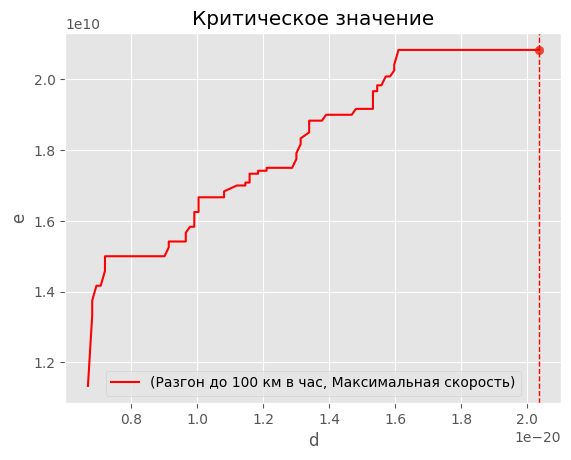

In [162]:
print(f'Критическое значение для разгона до 100 км в час и максимальной скорости равно {max(d)} и {max(e)} соответсвтенно')
plt.plot(sorted(d), sorted(e), color='red', label='(Разгон до 100 км в час, Максимальная скорость)')
plt.scatter(max(d), max(e))
plt.axvline(max(d), color='red', linestyle='--', lw=1)
plt.xlabel('d')
plt.ylabel('e')
plt.title('Критическое значение')
plt.legend()

### 5.5 (d, g)


Критическое значение для разгона до 100 км в час и расхода топлива на 100 км в городе равно 2.035178882e-20 и 14200.0 соответсвтенно


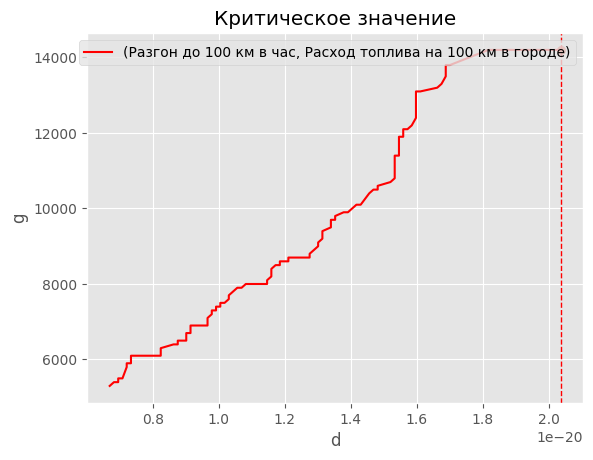

In [163]:
print(f'Критическое значение для разгона до 100 км в час и расхода топлива на 100 км в городе равно {max(d)} и {max(g)} соответсвтенно')
plt.plot(sorted(d), sorted(g), color='red', label='(Разгон до 100 км в час, Расход топлива на 100 км в городе)')
plt.scatter(max(d), max(g))
plt.axvline(max(d), color='red', linestyle='--', lw=1)
plt.xlabel('d')
plt.ylabel('g')
plt.title('Критическое значение')
plt.legend()

### 5.6 (e, g)


Критическое значение для максимальной скорости и расхода топлива на 100 км в городе равно 20835576496.75927 и 14200.0 соответсвтенно


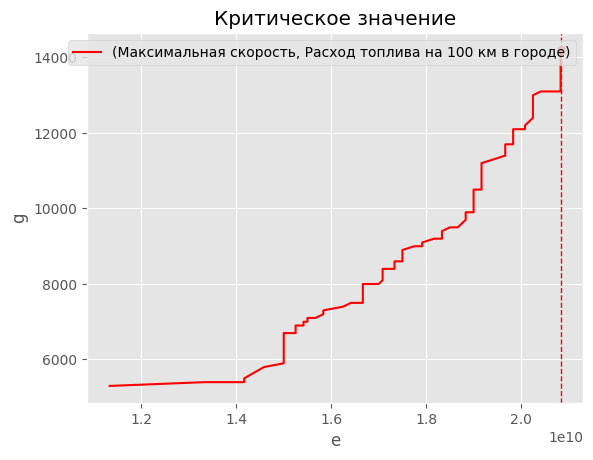

In [164]:
print(f'Критическое значение для максимальной скорости и расхода топлива на 100 км в городе равно {max(e)} и {max(g)} соответсвтенно')
plt.plot(sorted(e), sorted(g), color='red', label='(Максимальная скорость, Расход топлива на 100 км в городе)')
plt.scatter(max(e), max(g))
plt.axvline(max(e), color='red', linestyle='--', lw=1)
plt.xlabel('e')
plt.ylabel('g')
plt.title('Критическое значение')
plt.legend()